In [206]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Spotify Song Attributes

### Import data 

In [207]:

data = pd.read_csv('data.csv')

## Exploratory Data Analysis

In [208]:
data.describe()
#The data describes all the features. Column named 'target' shows if the song is liked or not. There are total 2017 songs.

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [209]:
data.head()
#Shows all the features and target.

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [210]:
data.info()
#Shows if there is any null entry. We can see there is no null entry.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


## Data Visualization

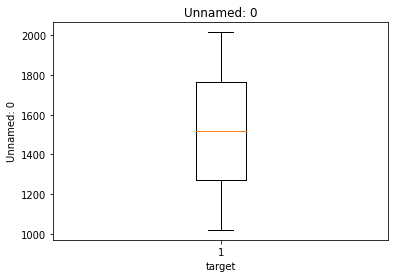

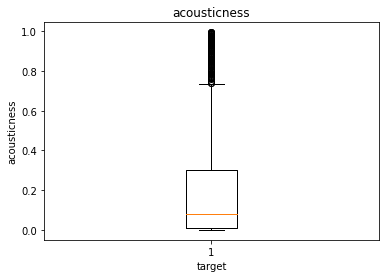

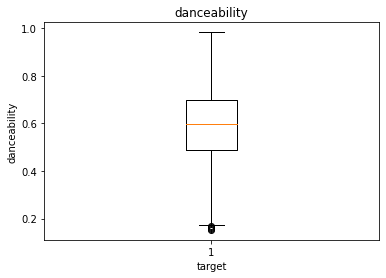

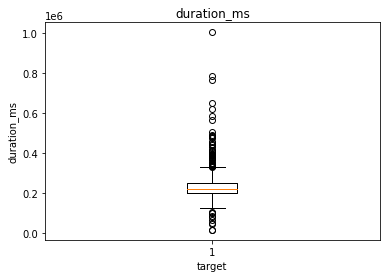

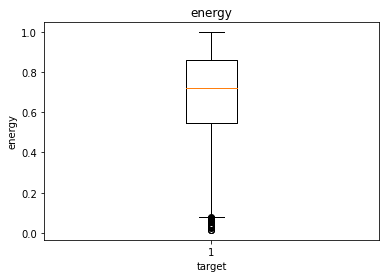

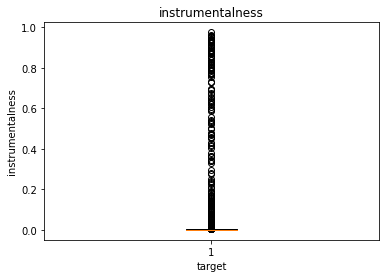

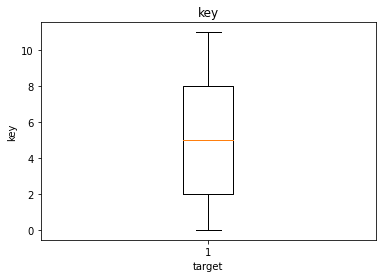

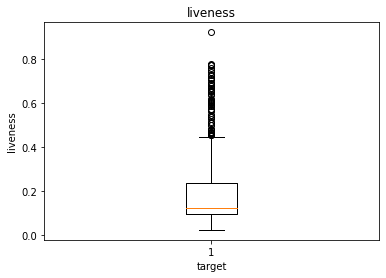

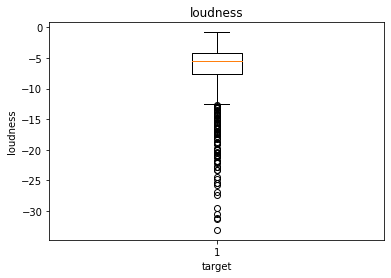

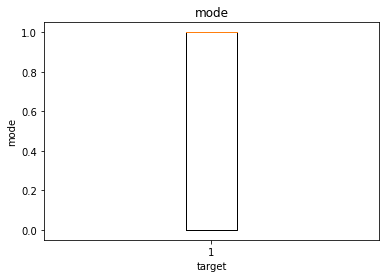

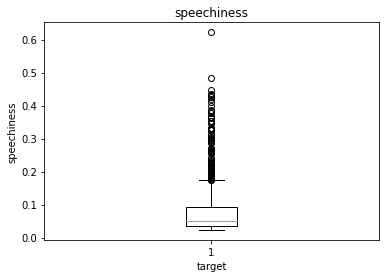

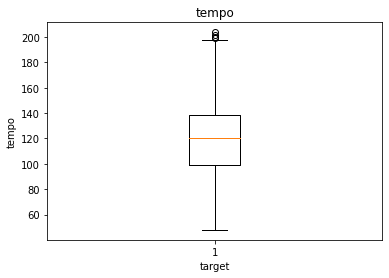

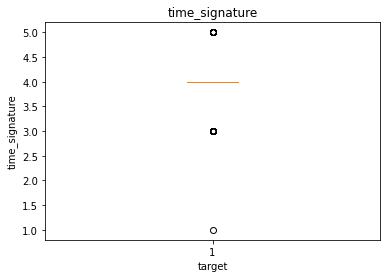

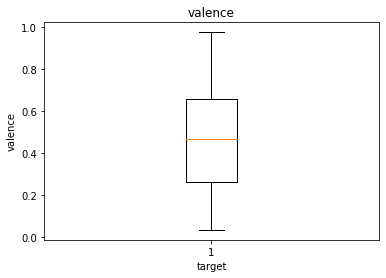

In [211]:
for label in data.columns[:-3]:
    plt.boxplot([data[data['target']==i][label] for i in range(0, 1)])
    plt.title(label)
    plt.xlabel('target')
    plt.ylabel(label)
    plt.show()
    #Shows the correlation of target with the features

<AxesSubplot:>

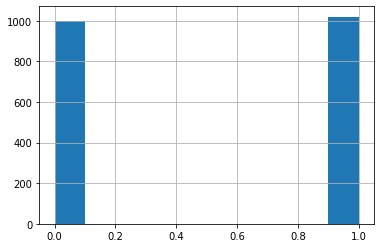

In [212]:
data['target'].hist()
#Shows the comparison between liked(1) and not liked(0)

In [213]:
data.corr()
#Shows the correlation between target and features

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
Unnamed: 0,1.000000,0.133055,-0.139615,-0.104185,-0.039880,-0.104641,-0.035611,-0.039962,0.021935,0.060639,-0.135362,-0.027890,-0.053235,-0.077812,-0.865969
acousticness,0.133055,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.139615,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,-0.104185,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.039880,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,-0.104641,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.035611,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.039962,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,0.021935,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.060639,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336


<AxesSubplot:>

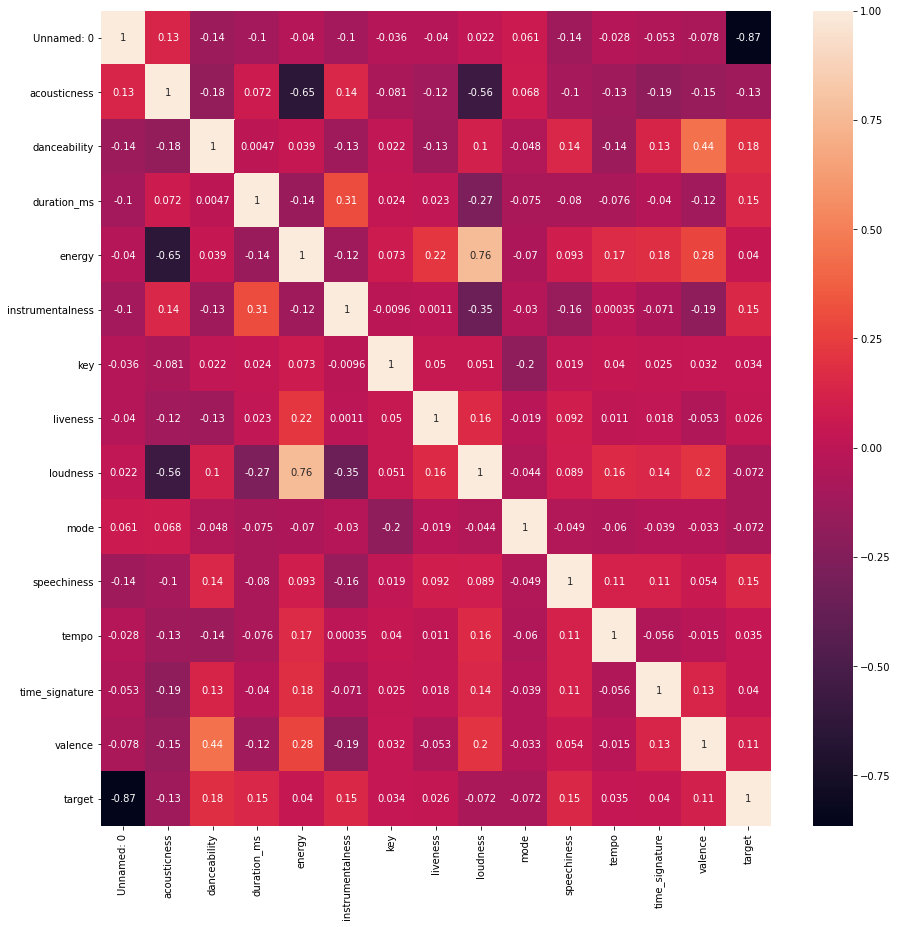

In [214]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

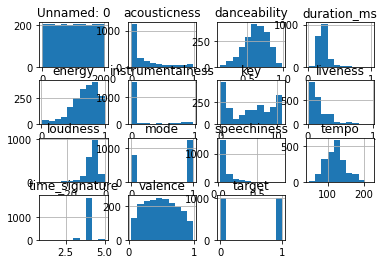

In [215]:
data.hist()
#Shows the distribution of features

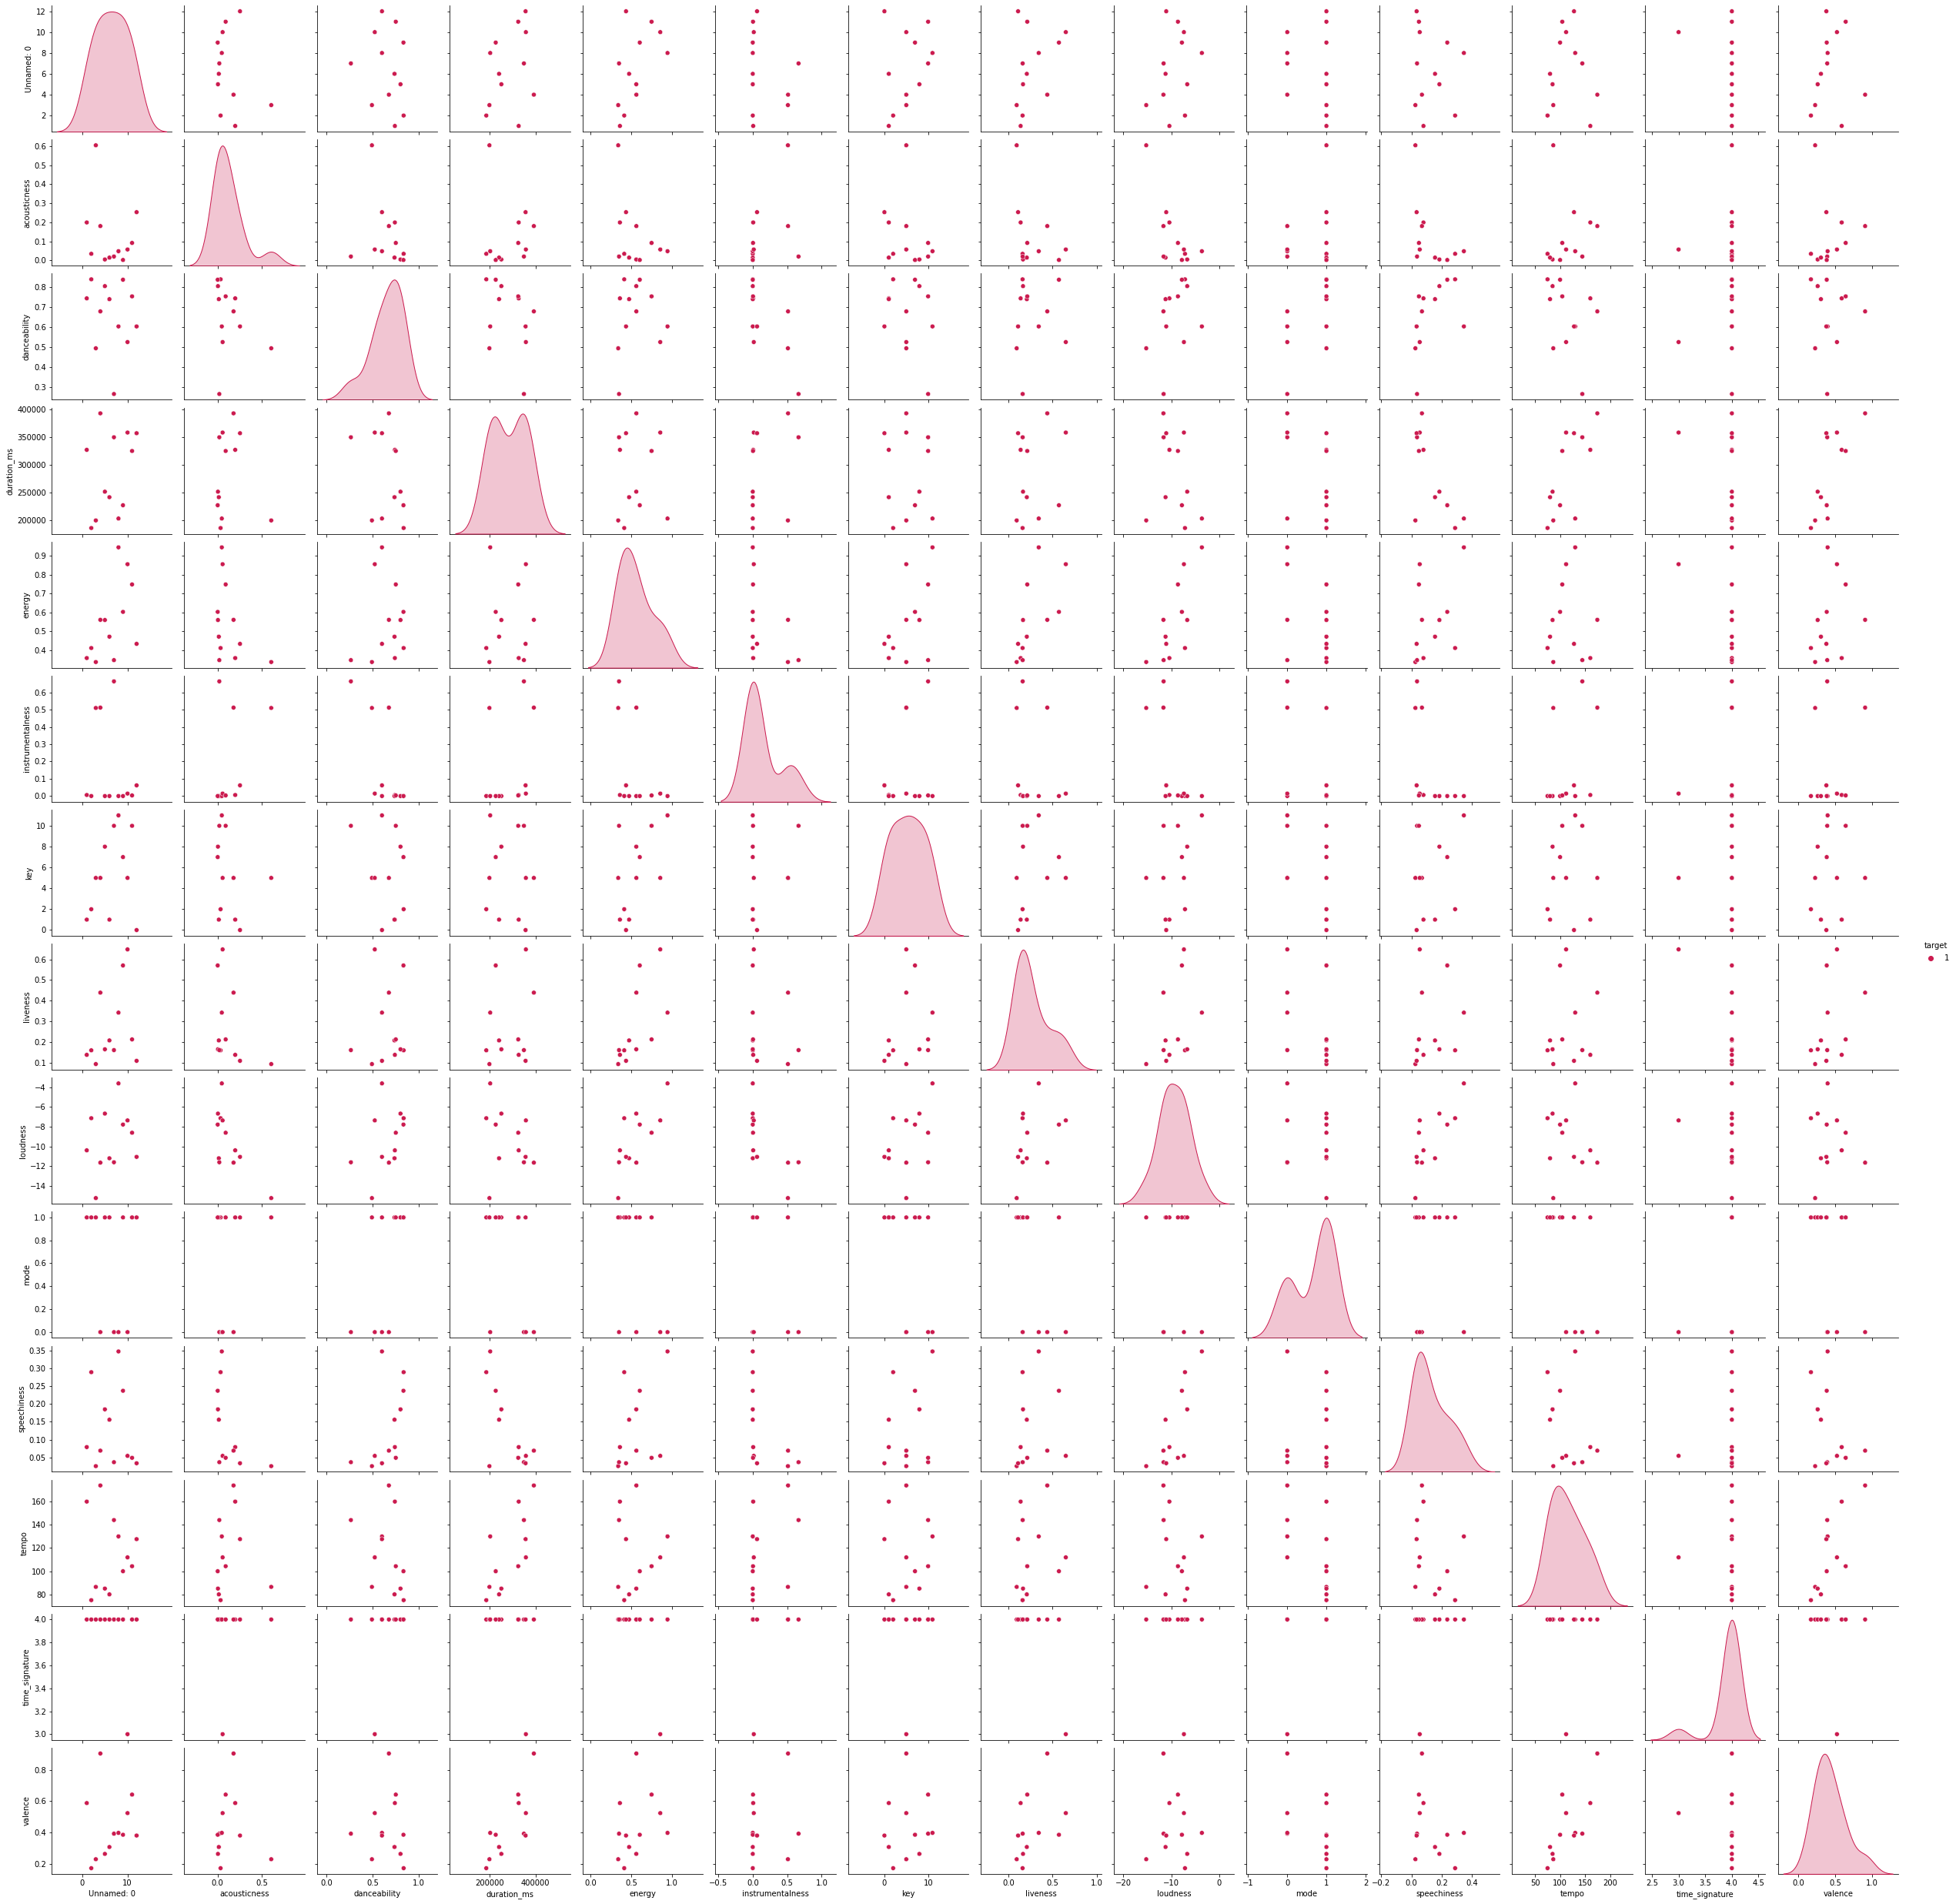

In [216]:
sns.pairplot(data=data[1:13], hue='target', palette='rocket')
#Shows the correlation among the feature variables

## Spliting training and testing data

In [217]:
x = data[data.columns[1:-3]]
y = data['target']
sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

## Decision Tree Classifier

In [218]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       206
           1       0.71      0.69      0.70       198

    accuracy                           0.71       404
   macro avg       0.71      0.71      0.71       404
weighted avg       0.71      0.71      0.71       404

0.68441837282417


## K Nearest Neighbour Classifier

In [219]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       206
           1       0.73      0.67      0.70       198

    accuracy                           0.72       404
   macro avg       0.72      0.72      0.72       404
weighted avg       0.72      0.72      0.72       404

0.6937159727014799


## Random Forest Classifier

In [220]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       206
           1       0.78      0.77      0.77       198

    accuracy                           0.78       404
   macro avg       0.78      0.78      0.78       404
weighted avg       0.78      0.78      0.78       404

0.7650026838432635
